## import necessary library

In [31]:
import pandas as pd
import seaborn as sns

In [2]:
glass_type = pd.read_csv('glass.csv')
glass_type

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Data understanding

In [3]:
glass_type.shape

(214, 10)

In [4]:
glass_type.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
glass_type.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

## Model Training | Testing | Evaluation

In [6]:
X = glass_type.drop('Type',axis=1)
y = glass_type[['Type']]

In [7]:
X.shape,y.shape

((214, 9), (214, 1))

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12,stratify=y)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score
import warnings
warnings.filterwarnings('ignore')

#### k=3

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
y_pred

print('accuracy score       :',round(accuracy_score(y_test,y_pred),4))

accuracy score       : 0.6977


#### k = 5

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)

print('accuracy score       :',round(accuracy_score(y_test,y_pred),4))

accuracy score       : 0.6279


#### k=7

In [34]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)

print('accuracy score       :',round(accuracy_score(y_test,y_pred),4))

accuracy score       : 0.6279


In [14]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)

print('accuracy score       :',round(accuracy_score(y_test,y_pred),4))

accuracy score       : 0.6047


## choose K optimum number

In [15]:
from sklearn.model_selection import cross_val_score

In [35]:
cv_scores = []
for i in range(1,31,2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    cross_val = cross_val_score(estimator=knn_model,X=X,y=y,cv=5)
    cv_scores.append(cross_val.mean())

In [36]:
cv_scores

[0.640531561461794,
 0.598781838316722,
 0.612624584717608,
 0.6032115171650055,
 0.5892580287929124,
 0.5891472868217054,
 0.6032115171650055,
 0.6032115171650055,
 0.626467331118494,
 0.6218161683277963,
 0.6031007751937983,
 0.5890365448504984,
 0.5842746400885936,
 0.5935769656699889,
 0.5843853820598006]

In [18]:
cv_scores.index(max(cv_scores))

0

### visualization

In [19]:
import matplotlib.pyplot as plt

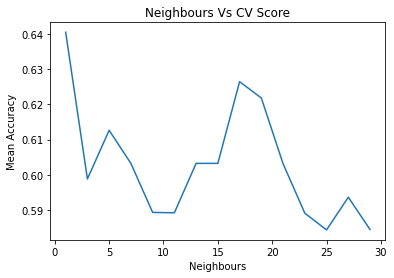

In [20]:
plt.plot(range(1,31,2),cv_scores)
plt.title('Neighbours Vs CV Score')
plt.xlabel('Neighbours')
plt.ylabel('Mean Accuracy')
plt.show()

## Conclusion

### 1 Neighbours is the Optimal Number for this data.

In [37]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)

print('accuracy score       :',round(accuracy_score(y_test,y_pred),4))

accuracy score       : 0.7209


## Conclusion

### we got accuracy 72% 

## ============================ End ======================================